<h1><center> Computing FUSION metacentric height </center> </h1> 

## Test Logbook

* __12:23 -__ With no weight __Pitch = -1.6º__ (too positive)
* __12:31 -__ With 266g of weight on the back *"handle"* __Pitch = 4.4º__ turned the vehicle neutral
* __12:34 -__ With 266g + 540g of weight on the back *"handle"* and the equivelent of 540g of steel in foam at the front *"first hole"* __Pitch = 26.9º__
* __12:43 -__ With 266g + 383g of weight on the back *"handle"* and the equivelent of 383g of steel in foam at the front *"first hole"* __Pitch = 20.7º__
* __12:51 -__ With 266g + 216g of weight on the back *"handle"* and the equivelent of 216g of steel in foam at the front *"first hole"* __Pitch = 13.9º__

## Constants 
* Distance between *"first hole"* and *"handle"* is 660mm (d)
* Distance between *"center of mass"* and *"first hole"* is 220mm (d1)
* Distance between *"center of mass"* and *"handle"* is 440mm (d2)
* Steel density - 7850 kg per square meter

<img src="./images/20180322_1200.jpg" width="500px">


In [1]:
# constants
d1 = 220/1000.0; 
d2 = 440/1000.0;
ro_water = 1000.0;
ro_steel = 7850.0;
m_fusion = 28.0; # TODO: JESSE ESTIMATION it needs to be measured 

In [2]:
def mass_in_water(m_air, ro_fluid, ro_obj ):
    return m_air * (1.0 - ro_fluid/ro_obj )

# water masses
m_const = mass_in_water(0.266, ro_water, ro_steel)
m1_water = mass_in_water(0.540, ro_water, ro_steel); # first experiment
m2_water = mass_in_water(0.383, ro_water, ro_steel); # second experiment
m3_water = mass_in_water(0.216, ro_water, ro_steel); # third experiment

print('m_const_water: %.3fkg'%(m_const));
print('m1_water: %.3fkg'%(m1_water));
print('m2_water: %.3fkg'%(m2_water));
print('m3_water: %.3fkg'%(m3_water));

m_const_water: 0.232kg
m1_water: 0.471kg
m2_water: 0.334kg
m3_water: 0.188kg


## Considering no weight on the back, just removing 4.4º pitch

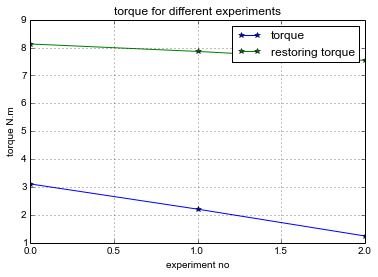

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# considering no weight on the back
torques = np.array([(d1+d2)*m1_water, (d1+d2)*m2_water, (d1+d2)*m3_water])*10
pitch = np.array([26.9, 20.7, 13.9]) - 4.4
r_torque_wo_back = torques/np.sin(pitch*np.pi/180.0); # restoring torques

plt.plot(torques, '-*', label='torque')
plt.plot(r_torque_wo_back, '-*', label='restoring torque')
plt.legend()
plt.grid()
plt.title('torque for different experiments')
plt.ylabel('torque N.m')
plt.xlabel('experiment no')

## Considering weight on the back, removing 1.6deg pitch

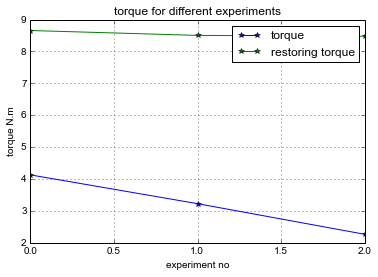

In [4]:
# considering weight on the back
torques = np.array([(d1+d2)*m1_water, (d1+d2)*m2_water, (d1+d2)*m3_water])*10.0 + d2*m_const*10.0 # N
pitch = np.array([26.9, 20.7, 13.9])+1.6
r_torque_w_back = torques/np.sin(pitch*np.pi/180.0); # restoring torques

plt.plot(torques, '-*', label='torque')
plt.plot(r_torque_w_back, '-*', label='restoring torque')
plt.legend()
plt.grid()
plt.title('torque for different experiments')
plt.ylabel('torque N.m')
plt.xlabel('experiment no')

# Conclusions

In [5]:
from numpy import mean, std
print("Not considering back weight and the resting -1.6deg pitch, mean %.4f std %.4f "%(mean(r_torque_wo_back/(m_fusion*10.0)), std(r_torque_wo_back/(m_fusion*10.0)) ) )
print("Considering back weight but not the resting -1.6deg pitch, mean %.4f std %.4f "%(mean(r_torque_w_back/(m_fusion*10.0)), std(r_torque_w_back/(m_fusion*10.0)) ) )

Not considering back weight and the resting -1.6deg pitch, mean 0.0280 std 0.0009 
Considering back weight but not the resting -1.6deg pitch, mean 0.0305 std 0.0003 


Checking the effect of the -1.6º on the computation

In [6]:
# assuming 0.305 metacentric height
print("-1.6deg pitch means %.3fN torque"%(0.0305*m_fusion*10*np.sin(1.6*np.pi/180.0)))

-1.6deg pitch means 0.238N torque


<h4 align="right">2018/04/22 Jorge Pais Ribeiro</h4>

In [11]:
weight=0.980-m_const;
print(mass_in_water(weight, ro_water, ro_steel))

0.65261333117
